In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# ***Data Exploration***

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# ***Encoding***

In [8]:
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# ***EDA*** 

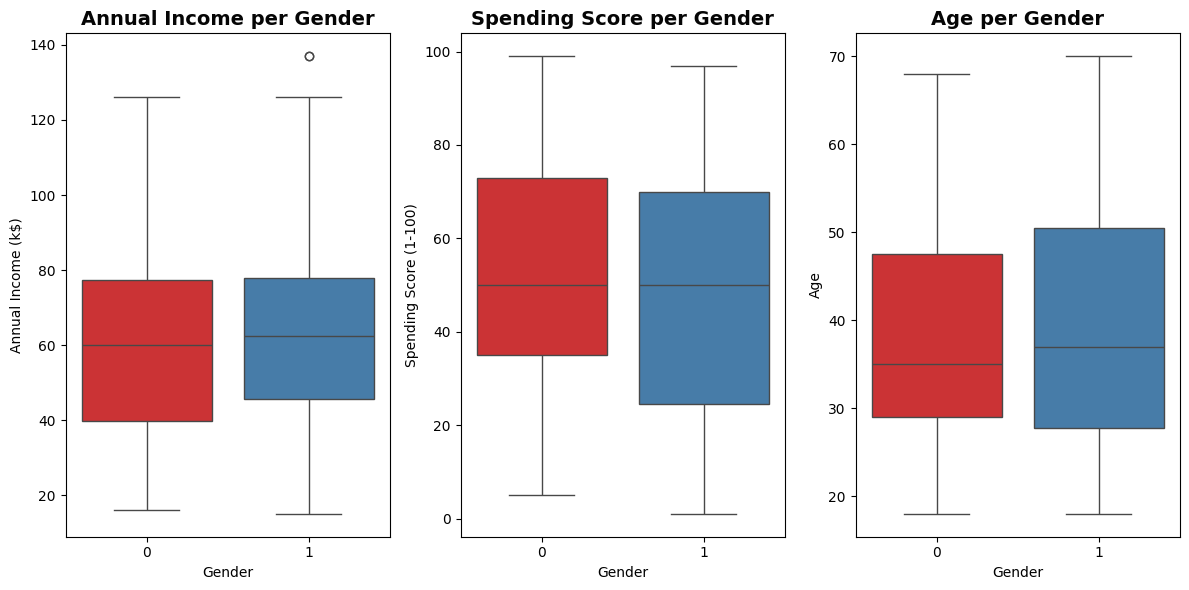

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)', palette='Set1', hue="Gender",legend=False)
plt.title('Annual Income per Gender', fontsize=14, fontweight='bold', color="#050505")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set1', hue="Gender",legend=False)
plt.title('Spending Score per Gender', fontsize=14, fontweight='bold', color="#050505")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Gender', y='Age', palette='Set1', hue="Gender",legend=False)
plt.title('Age per Gender', fontsize=14, fontweight='bold', color="#050505")

plt.tight_layout()
plt.show()

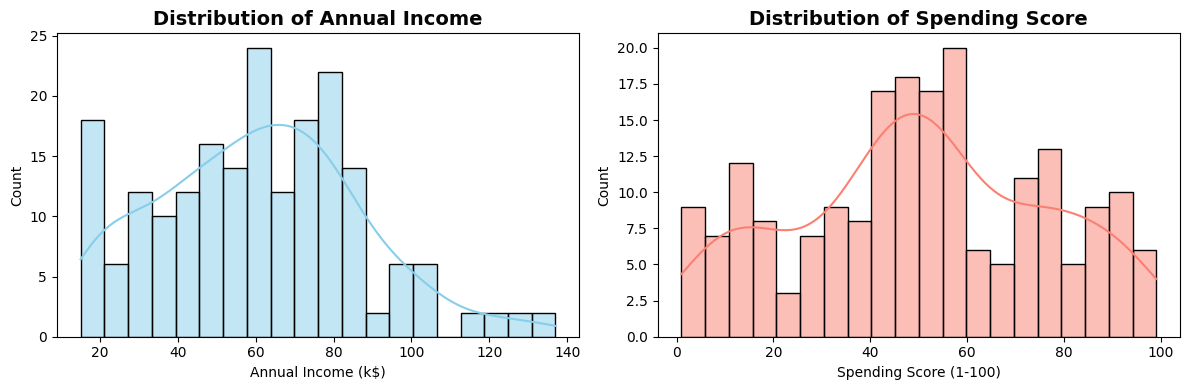

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Annual Income', fontsize=14, fontweight='bold', color="#050505")

plt.subplot(1, 2, 2)
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color='salmon')
plt.title('Distribution of Spending Score', fontsize=14, fontweight='bold', color="#050505")

plt.tight_layout()
plt.show()

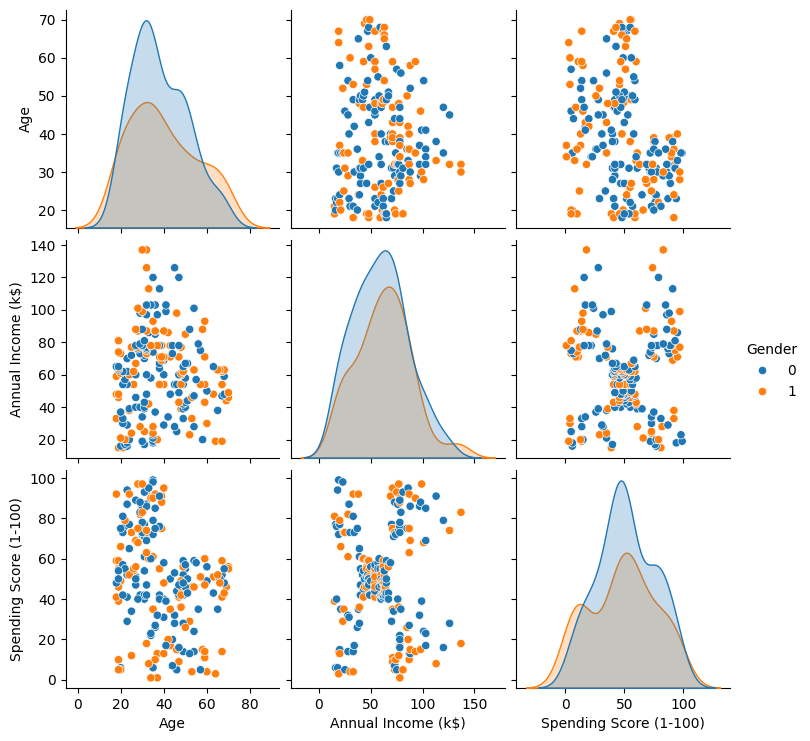

In [11]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.show()

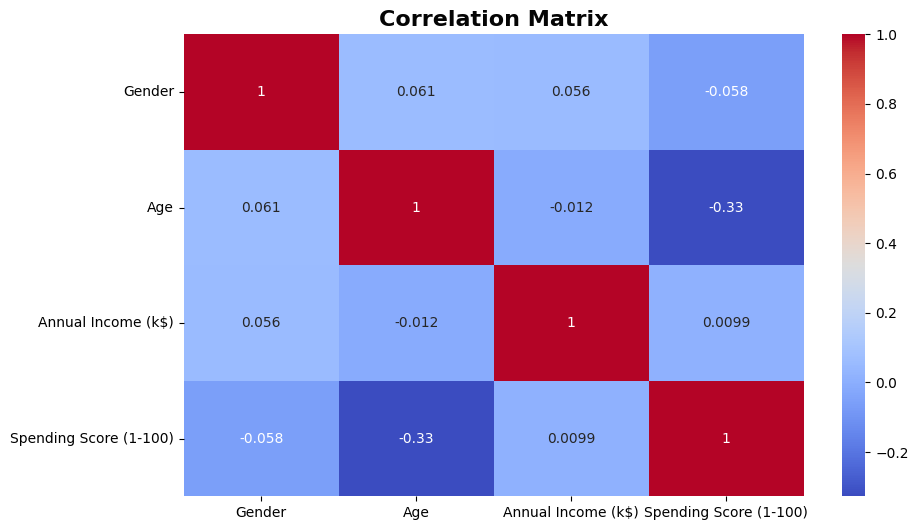

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', color="#050505")
plt.show()

# ***Modeling With only Annual Income & Spending Score***

## ***Scaling & Finding optimal k***

### ***KMeans Model***

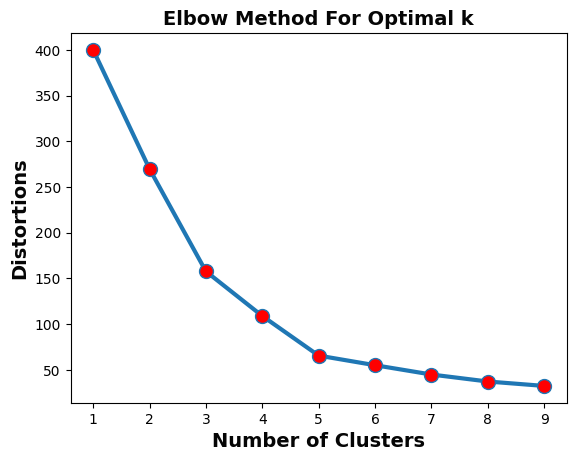

In [13]:
scaler = StandardScaler()
TEST_scaled_data = scaler.fit_transform(df[["Annual Income (k$)", "Spending Score (1-100)"]])

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++',n_init=10)
    kmeans.fit(TEST_scaled_data)
    inertia.append(kmeans.inertia_)

df_plot = {'num_clusters': range(1, 10), 'distortions': inertia}

plt.plot(df_plot['num_clusters'], df_plot['distortions'], marker='o', markerfacecolor='red', markersize=10,linewidth=3)
plt.xlabel('Number of Clusters',fontsize=14, fontweight='bold', color="#050505")
plt.ylabel('Distortions',fontsize=14, fontweight='bold', color="#050505")
plt.title('Elbow Method For Optimal k',fontsize=14, fontweight='bold', color="#050505")
plt.show()

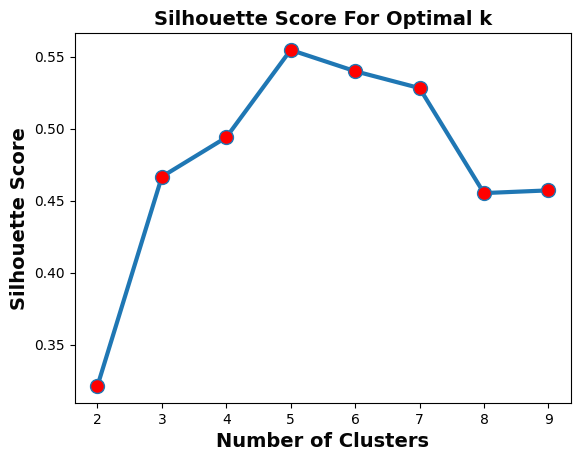

In [14]:
score = []

for i in range(2, 10):

    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++',n_init=10)
    kmeans.fit(TEST_scaled_data)
    score.append(silhouette_score(TEST_scaled_data, kmeans.labels_))

df_plot = {'num_clusters': range(2, 10), 'silhouette_score': score}
plt.plot(df_plot['num_clusters'], df_plot['silhouette_score'], marker='o', markerfacecolor='red', markersize=10,linewidth=3)
plt.xlabel('Number of Clusters',fontsize=14, fontweight='bold', color="#050505")
plt.ylabel('Silhouette Score',fontsize=14, fontweight='bold', color="#050505")
plt.title('Silhouette Score For Optimal k',fontsize=14, fontweight='bold', color="#050505")
plt.show()


In [15]:
Model1 = KMeans(n_clusters=5, random_state=42,init='k-means++',n_init=10)
Model1.fit(TEST_scaled_data)
predictions = Model1.predict(TEST_scaled_data)

### ***Visualizing the clusters***

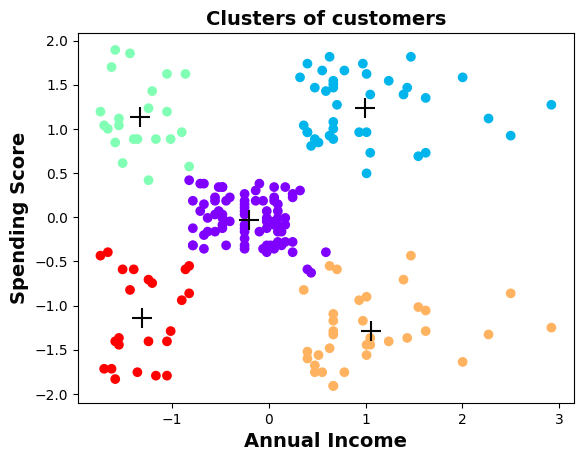

In [16]:
centroids=Model1.cluster_centers_

plt.scatter(TEST_scaled_data[:, 0], TEST_scaled_data[:, 1], c=predictions, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, c='#050505')
plt.xlabel('Annual Income', fontsize=14, fontweight='bold', color="#050505")
plt.ylabel('Spending Score', fontsize=14, fontweight='bold', color="#050505")
plt.title('Clusters of customers', fontsize=14, fontweight='bold', color="#050505")
plt.show()

### ***Some Analysis***

In [17]:
labels = Model1.labels_
df_clustered = df.copy()
df_clustered['Cluster'] = labels
df_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [18]:
df_stats = TEST_scaled_data.copy()
df_stats = pd.DataFrame(df_stats, columns=['Annual Income', 'Spending Score'])
df_stats['Cluster'] = predictions
df_stats.groupby('Cluster').mean()


,Annual Income,Spending Score
Cluster,,
0,-0.200913,-0.026456
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-1.307519,-1.136965


### ***DBSCAN Model***

### ***Finding Best Epsilon***

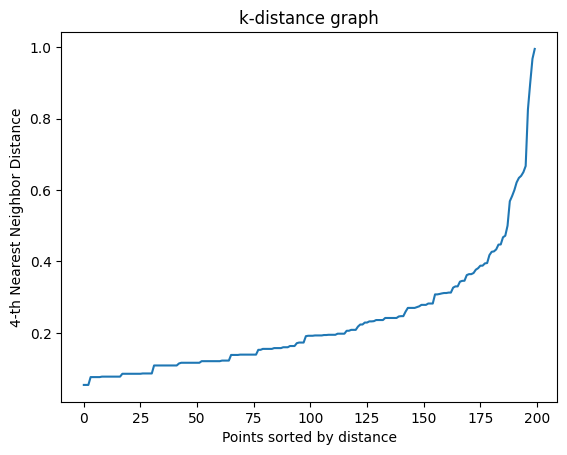

In [19]:
k = 4
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(TEST_scaled_data)
distances, indices = nbrs.kneighbors(TEST_scaled_data)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.show()

In [20]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan.fit(TEST_scaled_data)
labels = dbscan.labels_


dbscan_df = df.copy()
dbscan_df['Cluster'] = labels
dbscan_df["Cluster"].value_counts()

Cluster
 0    115
 2     32
 3     27
-1     15
 1     11
Name: count, dtype: int64

### ***Visualizing the clusters***

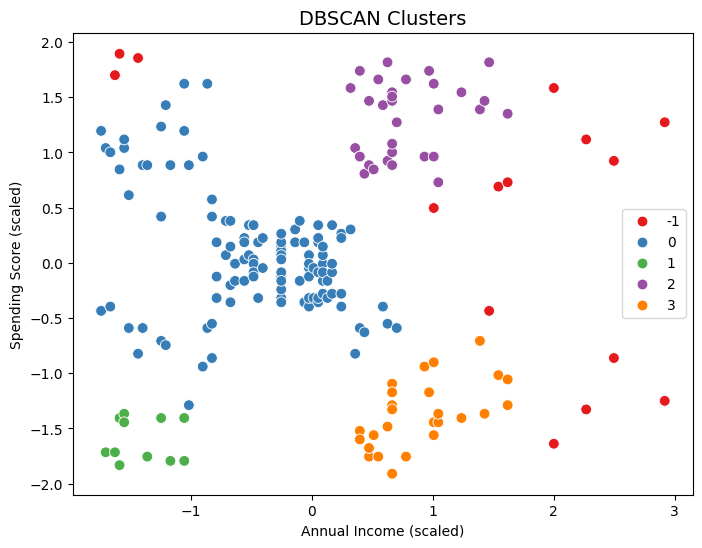

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=TEST_scaled_data[:,0], y=TEST_scaled_data[:,1], hue=labels, palette='Set1', s=60)
plt.title("DBSCAN Clusters", fontsize=14)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

### ***Some Analysis***

In [22]:
dbscan_df['Cluster'] = labels
cluster_summary = dbscan_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
-1                96.133333               61.800000
 0                48.304348               51.730435
 1                23.727273                8.909091
 2                80.875000               83.625000
 3                83.925926               14.444444


# ***Modeling With All the Featuers***

## ***Scaling & Finding optimal k***

### ***KMeans Model***

In [23]:
scaler_all = StandardScaler()
scaled_data_all = scaler_all.fit_transform(df.drop('Gender',axis=1))
scaled_data_all = pd.DataFrame(scaled_data_all, columns=df.columns[1:])
scaled_data_all['Gender'] = df['Gender']
scaled_data_all.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


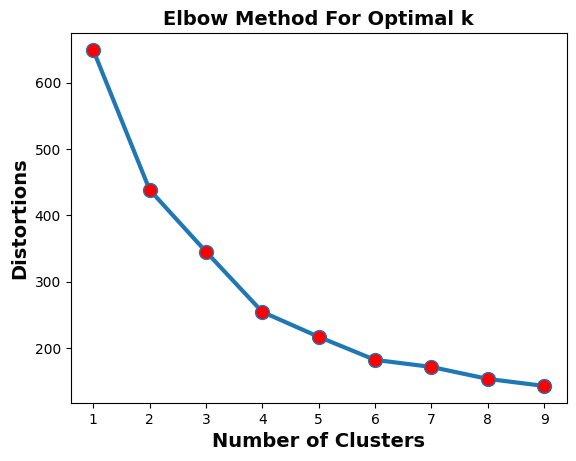

In [24]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++')
    kmeans.fit(scaled_data_all)
    inertia.append(kmeans.inertia_)

df_plot = {'num_clusters': range(1, 10), 'distortions': inertia}

plt.plot(df_plot['num_clusters'], df_plot['distortions'], marker='o', markerfacecolor='red', markersize=10,linewidth=3)
plt.xlabel('Number of Clusters',fontsize=14, fontweight='bold', color="#050505")
plt.ylabel('Distortions',fontsize=14, fontweight='bold', color="#050505")
plt.title('Elbow Method For Optimal k',fontsize=14, fontweight='bold', color="#050505")
plt.show()

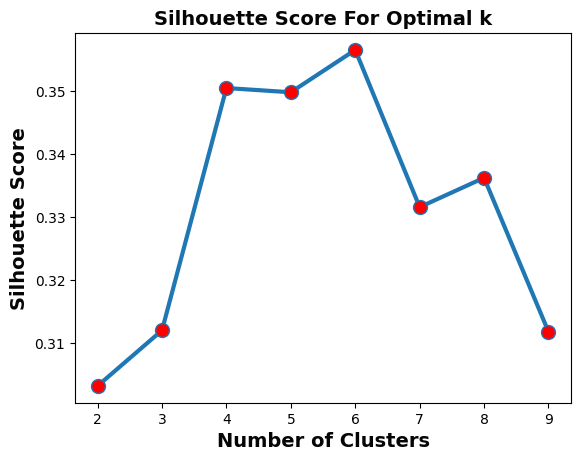

In [25]:
score = []

for i in range(2, 10):

    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++')
    kmeans.fit(scaled_data_all)
    score.append(silhouette_score(scaled_data_all, kmeans.labels_))

df_plot = {'num_clusters': range(2, 10), 'silhouette_score': score}
plt.plot(df_plot['num_clusters'], df_plot['silhouette_score'], marker='o', markerfacecolor='red', markersize=10,linewidth=3)
plt.xlabel('Number of Clusters',fontsize=14, fontweight='bold', color="#050505")
plt.ylabel('Silhouette Score',fontsize=14, fontweight='bold', color="#050505")
plt.title('Silhouette Score For Optimal k',fontsize=14, fontweight='bold', color="#050505")
plt.show()

In [26]:
Model2 = KMeans(n_clusters=6, random_state=42,init='k-means++')
Model2.fit(scaled_data_all)
predictions_all = Model2.predict(scaled_data_all)


In [27]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data_all)


### ***Visualizing the clusters***

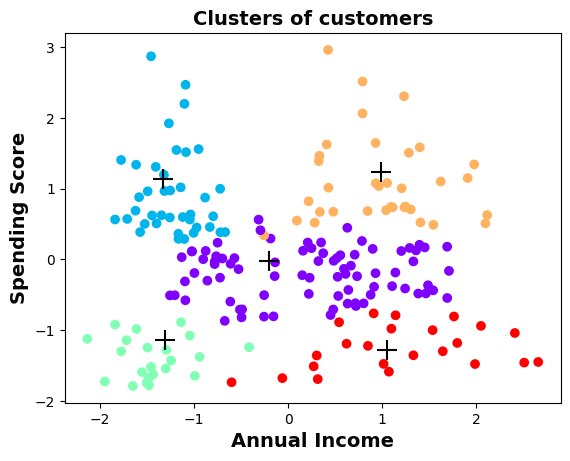

In [28]:
centroids_all=Model2.cluster_centers_

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=predictions, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, c='#050505')
plt.xlabel('Annual Income', fontsize=14, fontweight='bold', color="#050505")
plt.ylabel('Spending Score', fontsize=14, fontweight='bold', color="#050505")
plt.title('Clusters of customers', fontsize=14, fontweight='bold', color="#050505")
plt.show()

### ***Some Analysis***

In [29]:
all_labels = Model2.labels_
all_clustered = df.copy()
all_clustered['Cluster'] = all_labels
all_clustered.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,45.523810,26.285714,19.380952
3,41.264706,88.500000,16.764706
4,25.000000,25.260870,77.608696
5,27.000000,56.657895,49.131579


In [30]:
all_stats = scaled_data_all.copy()
all_stats = pd.DataFrame(all_stats, columns=df.columns[1:])
all_stats['Cluster'] = predictions_all
all_stats.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,1.254721,-0.240213,-0.043998
1,-0.441917,0.991583,1.239503
2,0.478957,-1.308230,-1.196444
3,0.173295,1.066454,-1.298010
4,-0.993969,-1.347348,1.064048
5,-0.850435,-0.148941,-0.041478


### ***DBSCAN Model***

### ***Finding Best Epsilon***

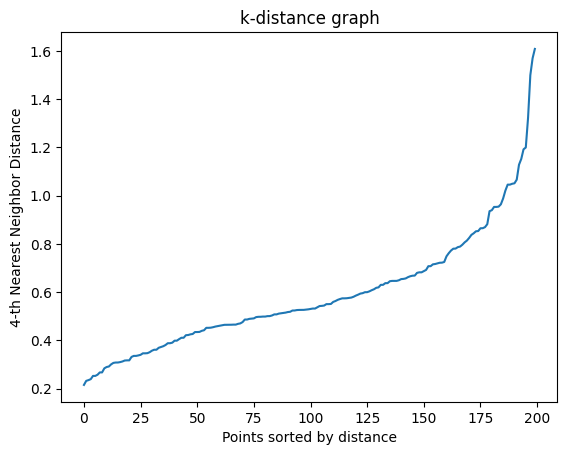

In [31]:
k = 4
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(scaled_data_all)
distances, indices = nbrs.kneighbors(scaled_data_all)

# Sort and plot distances
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.show()

In [32]:
dbscan_all = DBSCAN(eps=0.825, min_samples=5)
dbscan_all.fit(scaled_data_all)

labels_all = dbscan_all.labels_
dbscan_df_all = df.copy()
dbscan_df_all['Cluster'] = labels_all
dbscan_df_all["Cluster"].value_counts()

Cluster
 1    95
 2    66
-1    18
 3    12
 0     9
Name: count, dtype: int64

### ***Visualizing the clusters***

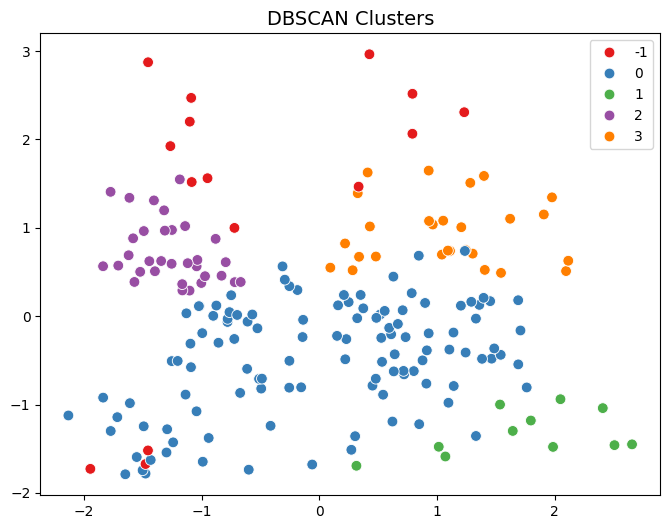

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=labels, palette='Set1', s=60)
plt.title("DBSCAN Clusters", fontsize=14)
plt.show()

### ***Some Analysis***

In [34]:
dbscan_df_all["Cluster"] = labels_all
cluster_summary_all = dbscan_df_all.groupby('Cluster')[['Age','Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary_all) 

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
-1       41.666667           57.722222               30.944444
 0       25.000000           25.777778               77.666667
 1       37.505263           56.126316               55.736842
 2       40.878788           66.772727               49.242424
 3       44.500000           91.833333               19.916667


In [ ]:
models = [
    ('KMeans (2 features)', Model1.labels_, TEST_scaled_data),
    ('DBSCAN (2 features)', dbscan.labels_, TEST_scaled_data),
    ('KMeans (all features)', Model2.labels_, scaled_data_all),
    ('DBSCAN (all features)', dbscan_all.labels_, scaled_data_all)
]

results = []

for name, labels, data in models:
    clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_points = (labels == -1).sum()
    
    if clusters > 1:
        score = round(silhouette_score(data, labels), 3)
    else:
        score = 'N/A'
    
    results.append({
        'Model': name,
        'Silhouette Score': score,
        'Clusters': clusters,
        'Noise Points': noise_points
    })

comparison_df = pd.DataFrame(results)
comparison_df['Silhouette Score'] = pd.to_numeric(comparison_df['Silhouette Score'], errors='coerce')
comparison_df = comparison_df.sort_values(by='Silhouette Score', ascending=False)

print(comparison_df)

                   Model  Silhouette Score  Clusters  Noise Points
0    KMeans (2 features)             0.555         5             0
1    DBSCAN (2 features)             0.413         4            15
2  KMeans (all features)             0.356         6             0
3  DBSCAN (all features)             0.038         4            18


# ***Conclusion***

Customer segmentation was performed using clustering techniques on the Mall Customer dataset. The primary goal was to group customers based on their Annual Income and Spending Score to identify distinct customer profiles for marketing strategies.

    - K-Means Clustering:

        After evaluating the Elbow Method and Silhouette Score, we selected 5 clusters as the optimal number.

        Visualization of clusters showed clear separation between groups such as:

            High-income & high-spending customers (premium customers).

            Low-income & low-spending customers.

            Moderate-income customers with varying spending patterns.

    - DBSCAN (Bonus):

        DBSCAN was applied to explore density-based clustering.

        The results showed 4 main clusters with some noise points (-1), indicating that DBSCAN can capture outliers but is sensitive to 
        parameter tuning.

    - Spending Analysis:

        Average spending scores per cluster were analyzed, showing that clusters differ significantly in spending behavior, which is 
        crucial for targeted marketing.